(699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
중복 제거 이전:  (699, 11)
중복 제거 이후:  (691, 11)
bare_nuclei 열의 고유값:  ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
train data 개수:  (472, 9)
test data 개수:  (203, 9)


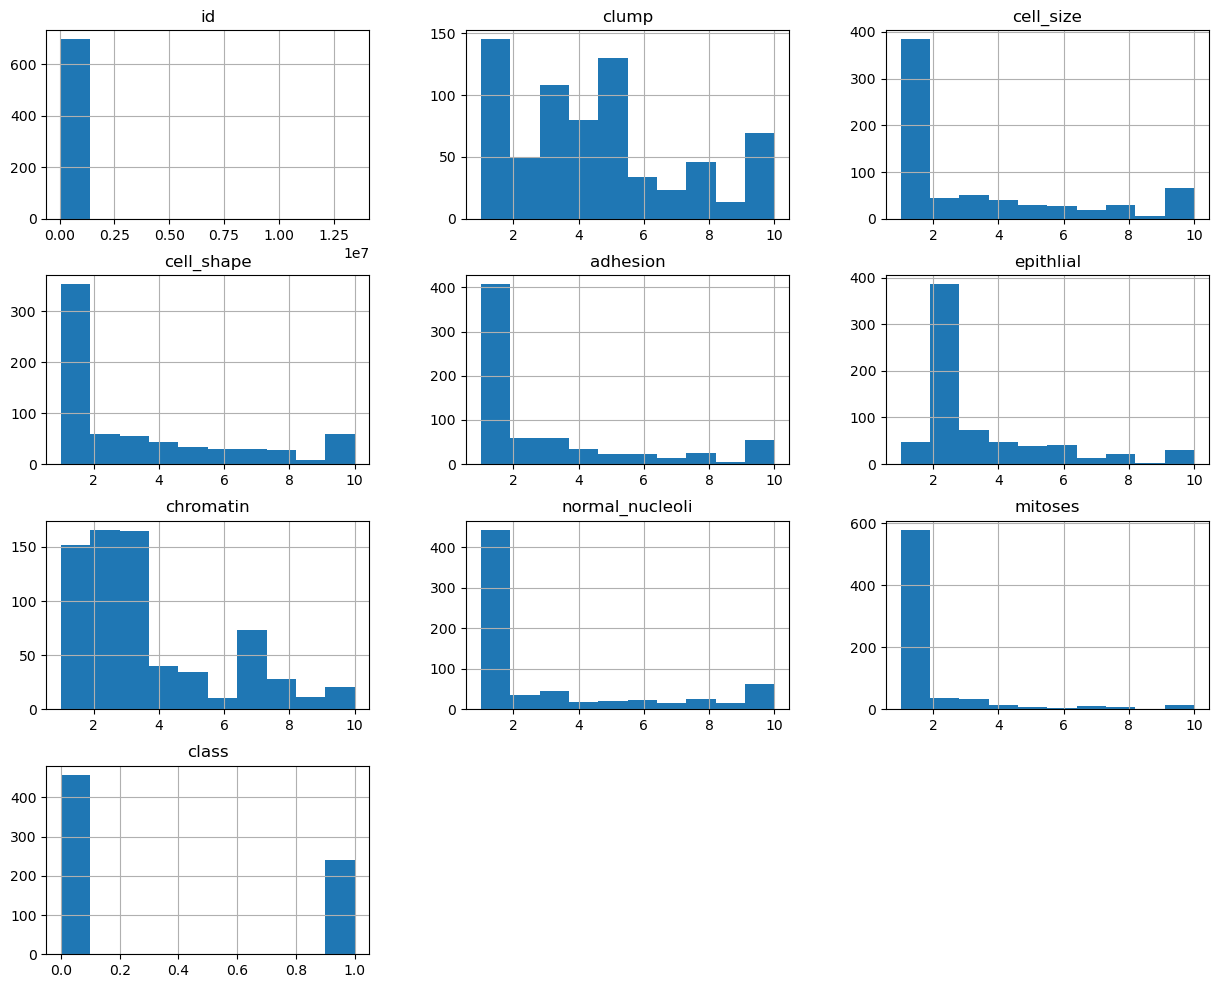

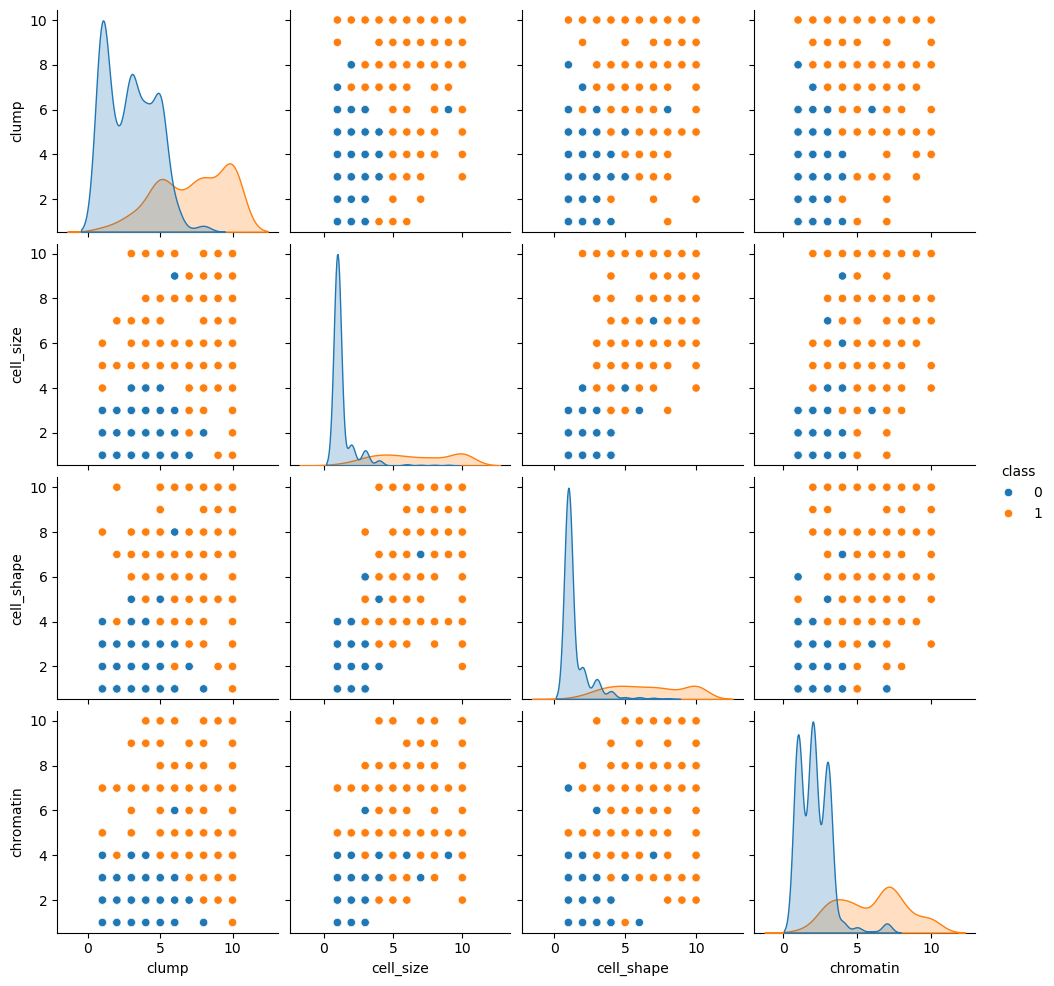

In [22]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
Sbreast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)


df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

print(df.shape)

df.sample(5)

df.info()

df.describe(include='all')

df.isnull().sum()

df.duplicated().sum()

df['class'].value_counts(normalize=True)

df['class'] = df['class'].map({2:0, 4:1})
df['class'].value_counts(normalize=True)

df.hist(figsize=(15, 12));

vis_cols = ['clump', 'cell_size', 'cell_shape', 'chromatin',  'class']
sns.pairplot(data=df[vis_cols], hue='class');

print('중복 제거 이전: ', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후: ', df.shape)

print('bare_nuclei 열의 고유값: ', df['bare_nuclei'].unique())

df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)    
df = df.dropna(subset=['bare_nuclei'], axis=0)                
df['bare_nuclei'] = df['bare_nuclei'].astype('int')           

df.describe()

train_features = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']
X = df[train_features]       
y = df['class']                

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)      

print(y_hat[0:10])
print(y_test.values[0:10])

tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(tree_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

features = pd.DataFrame(tree_model.feature_importances_, index=train_features, columns=['Importance'])
features = features.sort_values(by='Importance', ascending=False)
features

plt.figure(figsize=(10, 6))
sns.barplot(x=features.Importance, y=features.index,hue=features.index, legend=False, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()